

# **NLP Task 2**

## **DJS Synapse Learning Period**
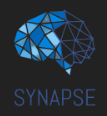

#**Word Embedding**
2 types:


1.   Count or Frequency based (BoW, TF-IDF, One Hot encoding)
2.   Deep Learning Trained models (Word2Vec, Average Word2Vec)

Word2Vec: CBOW, SkipGrams
Resources: https://youtu.be/Z1VsHYcNXDI

In [ ]:
!pip install gensim==4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 46.6 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import pandas as pd
import numpy as np


Dataset link: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
! unzip imdb-dataset-of-50k-movie-reviews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 31% 8.00M/25.7M [00:00<00:00, 81.5MB/s]
100% 25.7M/25.7M [00:00<00:00, 171MB/s] 
Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [ ]:
# Load the dataset and delete the latter 2 columns while preprocessing
df = pd.read_csv('/content/IMDB Dataset.csv', encoding = "ISO-8859-1")

In [ ]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Create a function to pre-process your data. Using stemming or lemmatization is upto your own choice

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import re

In [ ]:
count = 0

In [ ]:
def preprocess(text):
  rev = re.sub('^a-zA-Z', ' ', text)
  rev = rev.lower()
  rev = nltk.word_tokenize(rev)
  rev = [lemmatizer.lemmatize(word) for word in rev if word not in set(stopwords.words('english'))]
  return rev

In [ ]:
df['review']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [ ]:
df['words'] = df['review'].apply(preprocess)

In [ ]:
df

,review,sentiment,words
0,One of the other reviewers has mentioned that ...,positive,"[one, reviewer, mentioned, watching, 1, oz, ep..."
1,A wonderful little production. <br /><br />The...,positive,"[wonderful, little, production, ., <, br, /, >..."
2,I thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,"[basically, 's, family, little, boy, (, jake, ..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei, 's, ``, love, time, money, ''..."
...,...,...,...
49995,I thought this movie did a down right good job...,positive,"[thought, movie, right, good, job, ., n't, cre..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"[bad, plot, ,, bad, dialogue, ,, bad, acting, ..."
49997,I am a Catholic taught in parochial elementary...,negative,"[catholic, taught, parochial, elementary, scho..."
49998,I'm going to have to disagree with the previou...,negative,"['m, going, disagree, previous, comment, side,..."


In [ ]:
#Add your code here
wordVec=[]
sentences = df['review']
for i in range(len(sentences)):
  # words = nltk.word_tokenize(re.sub('^a-zA-Z', ' ', sentences[i]).lower())
  # words = [lemmatizer.lemmatize(word) for word in words not in set(stopwords.words('english'))]
  # wordVec.append(words)
  rev = re.sub('^a-zA-Z', ' ', sentences[i])
  rev = rev.lower()
  rev = nltk.word_tokenize(rev)
  rev = [lemmatizer.lemmatize(word) for word in rev if word not in set(stopwords.words('english'))]
  wordVec.append(rev)
  

##Word2Vec


###CBOW or SkipGram (sg = 0/1) default is CBOW

Word2Vec resources: https://builtin.com/machine-learning/nlp-word2vec-python

In [ ]:
import gensim

/usr/local/lib/python3.8/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
model=gensim.models.Word2Vec(df['words'],min_count=2,window=5)#window, min_count, max_count, size are important hyperparameters

In [ ]:
model.wv.most_similar('man')

[('lady', 0.6429943442344666),
 ('woman', 0.6067513227462769),
 ('men', 0.5973765254020691),
 ('person', 0.5093280076980591),
 ('brigham', 0.46765145659446716),
 ('forty-year', 0.45458272099494934),
 ('guy', 0.45436906814575195),
 ('loretta', 0.446574866771698),
 ('mida', 0.4400346279144287),
 ('innocent', 0.4382067322731018)]

##Average Word2Vec
In average Word2Vec, the model is fed with an average of all the vectors obtained from the vectorization techniques. For eg. in this task, our model will be fed a single array of size Nx1 which is an average vector of all the vectors in the sentence.

In [ ]:
def avg_word2vec(doc):
  return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)

In [ ]:
# Train a suitable model using Word2Vec and avg_word2vec and find out it's classification report and accuracy on the given dataset
# Add your code in the following cells

In [ ]:
# Add your code for the Word2Vec model in the following cells

In [ ]:
# Add your code for the Average Word2Vec model in the following cells

In [ ]:
df['vector'] = df['words'].apply(avg_word2vec)

In [ ]:
df

,review,sentiment,words,vector
0,One of the other reviewers has mentioned that ...,positive,"[one, reviewer, mentioned, watching, 1, oz, ep...","[0.56892604, 0.8175031, 0.3820979, 0.024191743..."
1,A wonderful little production. <br /><br />The...,positive,"[wonderful, little, production, ., <, br, /, >...","[0.38312152, 0.7593643, -0.52752143, 0.2882633..."
2,I thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su...","[0.45793942, 0.9937225, 0.09324283, 0.24970922..."
3,Basically there's a family where a little boy ...,negative,"[basically, 's, family, little, boy, (, jake, ...","[0.49304217, 1.1902179, -0.04357327, 0.2663686..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei, 's, ``, love, time, money, ''...","[0.5302531, 1.1389982, -0.004989212, 0.0614305..."
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,"[thought, movie, right, good, job, ., n't, cre...","[0.61181796, 1.4030187, 0.43938974, 0.14855503..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"[bad, plot, ,, bad, dialogue, ,, bad, acting, ...","[0.58999413, 1.0748738, -0.33977875, 0.1255879..."
49997,I am a Catholic taught in parochial elementary...,negative,"[catholic, taught, parochial, elementary, scho...","[0.5717647, 0.9780376, 0.5324598, -0.05794978,..."
49998,I'm going to have to disagree with the previou...,negative,"['m, going, disagree, previous, comment, side,...","[0.2779657, 0.56628066, 0.52373457, 0.129138, ..."


In [ ]:
df.shape

(50000, 4)

In [ ]:
X = np.vstack(df['vector'].values)

In [ ]:
X

array([[ 0.56892604,  0.8175031 ,  0.3820979 , ...,  0.21168233,
        -0.33645064,  0.24147063],
       [ 0.38312152,  0.7593643 , -0.52752143, ...,  0.30490455,
        -0.352874  ,  0.12130895],
       [ 0.45793942,  0.9937225 ,  0.09324283, ...,  0.27672112,
        -0.23082666,  0.17372261],
       ...,
       [ 0.5717647 ,  0.9780376 ,  0.5324598 , ...,  0.27390474,
        -0.3942089 ,  0.1152819 ],
       [ 0.2779657 ,  0.56628066,  0.52373457, ..., -0.43831345,
        -0.33535   ,  0.19377364],
       [ 0.54438716,  1.0502431 ,  0.3455907 , ..., -0.03673662,
        -0.6118956 ,  0.38137475]], dtype=float32)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.3, random_state=42)

# Train the classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate the accuracy
accuracy = clf.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

              precision    recall  f1-score   support

    negative       0.86      0.85      0.85      7411
    positive       0.85      0.86      0.86      7589

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000

Accuracy: 0.85


#Create your own embedding layer using Keras

Advised to use colab for GPU purposes.

You can use jupyter nb if your PC has a dedicated graphics card.

If using colab, got to the "Runtime" tab and change "Runtime type" to GPU

In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 85.5 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorboard
    Found existing i

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import numpy as np

##One-Hot representation

The one-hot library on the input vocabulary size returns an array of integers ranging from 1 to vocabulary size. It indicates the index of the '1' in the one hot representation for the word.

Build sequential models using keras: https://www.youtube.com/watch?v=8uC-WT1LYnU, https://www.youtube.com/watch?v=VGCHcgmZu24

In [ ]:
from functools import reduce
flatlist = reduce(lambda a,b:a+b, df['words'])
print(flatlist)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
len(flatlist)

8462662

In [ ]:
vocab_size = 10000

In [ ]:
# OH_rep = [one_hot('''sentences''', '''vocabulary size''')] choose a good vocabulary size to avoid out of vocabulary error
# Add your code here
OH_rep = [one_hot(sentence,vocab_size) for sentence in df['review']]

In [ ]:
# Padding: 2 types: pre padding, post padding try both
# Wisely select the sentence length to accomodate all sentences with a couple of extra bits to avoid errors.
# Add your code here
post_padded_sequence = pad_sequences(OH_rep, padding='post', maxlen=200)
print(post_padded_sequence)

[[6932 1477 1544 ... 3521 3345  725]
 [7587  150 8920 ...    0    0    0]
 [9411 6059 2085 ...    0    0    0]
 ...
 [6509 9893 8337 ... 9726 8744 7287]
 [5931 8434 1983 ... 8392  888 1122]
 [2883 8752 1662 ...    0    0    0]]


In [ ]:
# select your feature dimensions: 5 for very small datasets, 10 is generally a good choice
dim=10

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# y = OneHotEncoder().fit_transform(np.array(df['sentiment']).reshape(-1,1)).toarray()
y = OneHotEncoder().fit_transform(np.array(df['sentiment']).reshape(1,-1)).toarray()

In [ ]:
y = y.reshape(-1,1).flatten()

In [ ]:
# Create a sequential model with an embedding layer with the appropriate vocabulary size and the decided sentence length
# Use an appropriate optimizer 'adam' and loss function 'mse' to compile your model
# Add your code here
model = Sequential([
    Embedding(vocab_size, dim),
    Dense(2),
    Flatten()
])

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(post_padded_sequence,y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((35000, 200), (35000,))

In [ ]:
model.fit(X_train,y_train)

1094/1094 [==============================] - 5s 4ms/step - loss: 0.0961 - accuracy: 0.0127


# **Plotting Embeddings**
T-distributed Stochastic Neighbor Embedding



Let's now visualize some of our embeddings. To plot embeddings with a dimensionality of 100 or more, we first need to map them to a dimensionality of 2. We do this with the popular [t-SNE](https://lvdmaaten.github.io/tsne/) method. T-SNE, short for t-distributed Stochastic Neighbor Embedding, helps us visualize high-dimensional data by mapping similar data to nearby points and dissimilar data to distance points in the low-dimensional space.

T-SNE is present in [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). To run it, we just have to specify the number of dimensions we'd like to map the data to ('n_components'), and the similarity metric that t-SNE should use to compute the similarity between two data points ('metric'). We're going to map to 2 dimensions and use the cosine as our similarity metric. Additionally, we use PCA as an initialization method to remove some noise and speed up computation. The [Scikit-learn user guide](https://scikit-learn.org/stable/modules/manifold.html#t-sne) contains some additional tips for optimizing performance. 

Plotting all the embeddings in our vector space would result in a very crowded figure where the labels are hardly legible. Therefore we'll focus on a subset of embeddings by selecting the 200 most similar words to a target word.

Intuition to how TSNE works: https://youtu.be/NEaUSP4YerM

In [ ]:
# will take some time to run
model = gensim.models.Word2Vec(df['words'], min_count=100, window=5, vector_size=100)

In [ ]:
model.wv["point"]

array([ 1.2852832 , -0.47927442,  0.79335904, -0.73781127, -0.17380285,
        2.0995033 , -0.63319117, -0.3998549 ,  2.962915  , -1.9241757 ,
        0.31470674, -1.494741  ,  1.0350317 ,  1.163822  ,  0.5249681 ,
        1.3609456 , -0.54911   , -1.6782436 ,  0.57584596,  0.8681108 ,
       -0.8924741 ,  0.84659857,  0.7422334 , -0.5261673 , -0.30090216,
       -1.42851   , -1.0176717 ,  0.38492277,  0.5876618 , -0.87902117,
        0.5138737 ,  1.9387683 ,  1.6386285 , -1.0334204 , -1.0088534 ,
       -0.72754043,  1.3485605 ,  0.10675412,  1.5612184 ,  0.24804695,
        0.47316453,  0.57283026,  0.797526  ,  0.562084  , -0.99963343,
       -1.2298238 , -0.04622829, -0.8592695 , -0.25631097, -0.38337007,
       -1.2365617 ,  0.34378898,  1.5104746 , -0.6378469 , -0.3939419 ,
        0.8186521 , -1.0897382 ,  0.20701565, -0.94428587, -1.8379855 ,
       -1.8424892 ,  0.1377388 , -0.32812503, -0.2567206 ,  2.4619763 ,
       -0.2993774 ,  0.6609714 ,  0.13827476,  1.0765913 , -1.17

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
target_word= 'hey'
# Selecting the top 200 similar words for plotting
selected_words = [w[0] for w in model.wv.most_similar(positive=[target_word], topn=200)] + [target_word]
embeddings = [model.wv[w] for w in selected_words] + model.wv["point"]

mapped_embeddings = TSNE(n_components=2, metric='cosine', init='pca').fit_transform(embeddings)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


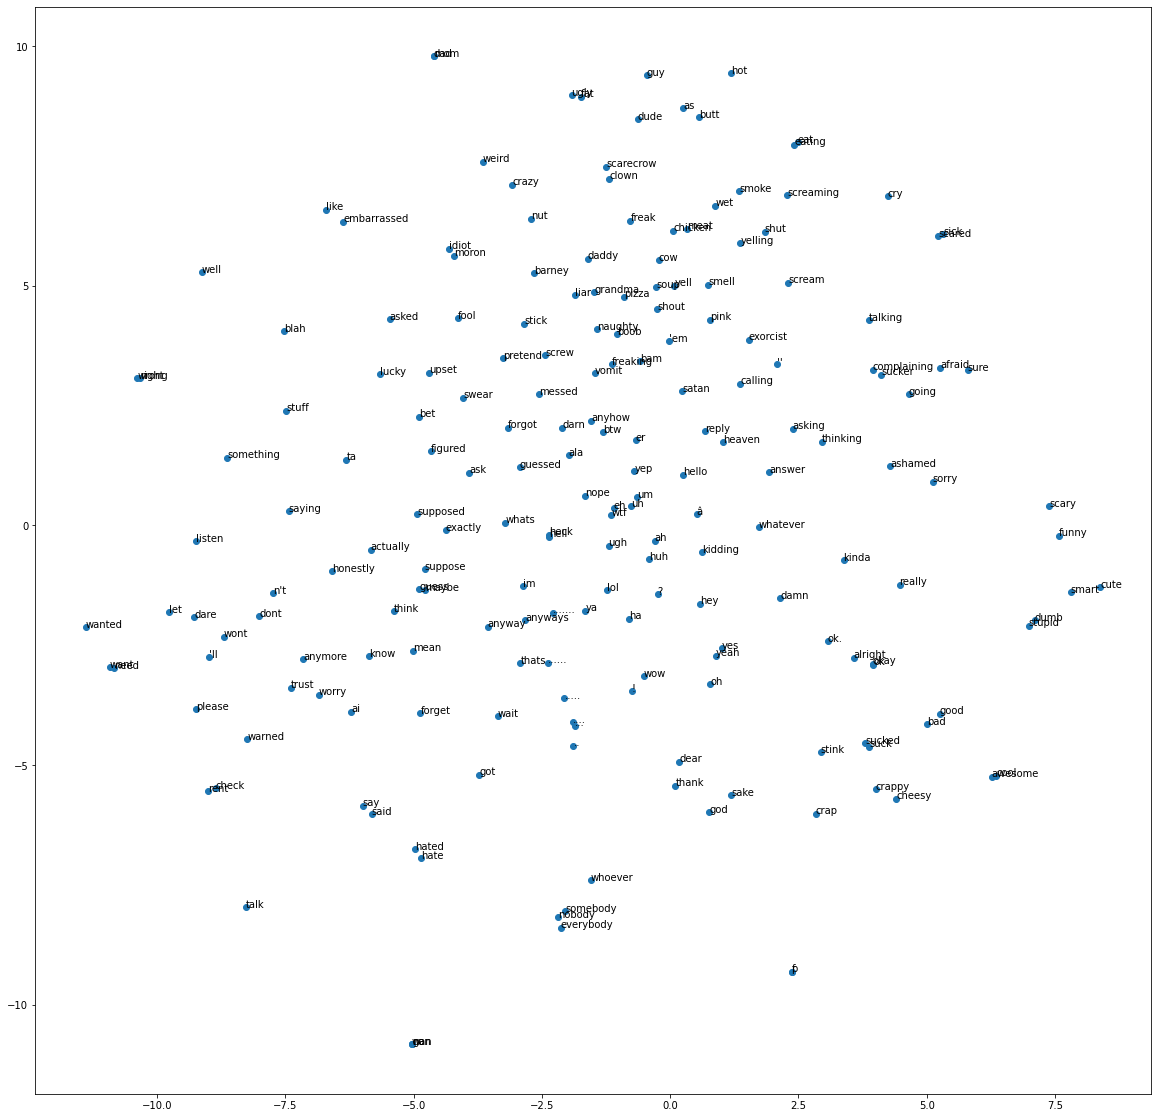

In [ ]:
plt.figure(figsize=(20,20))
x = mapped_embeddings[:,0]
y = mapped_embeddings[:,1]
plt.scatter(x, y)

for i, txt in enumerate(selected_words):
    plt.annotate(txt, (x[i], y[i]))